# Adafruit Blinka + PCT2075
<img src="https://cdn-shop.adafruit.com/1200x900/4369-04.jpg" alt="PCT2075" height= "500" width="500"/>

In [1]:
# Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-blinka adafruit-circuitpython-msa301 hidapi ipympl adafruit-circuitpython-pct2075

# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

  Created wheel for adafruit-circuitpython-pct2075: filename=adafruit_circuitpython_pct2075-1.1.2-py3-none-any.whl size=6123 sha256=6f0dff0ac830fae183ef159ac6f8b317680ec1803f9878af0a3114cf17635a01
  Stored in directory: /home/markus/.cache/pip/wheels/30/12/19/467477d13770ac29b8b509e6ef81a2c8e43fed78022f8e5ff4
Successfully built adafruit-circuitpython-pct2075


Verify the cell below returns the temperature before proceeding to the graph cell.

In [2]:
import board
import busio
import adafruit_pct2075
i2c = busio.I2C(board.SCL, board.SDA)

pct = adafruit_pct2075.PCT2075(i2c)
print('Temperature: {}*C'.format(pct.temperature))

Temperature: 23.125*C


This cell will graph the temperature values over time

<IPython.core.display.Javascript object>


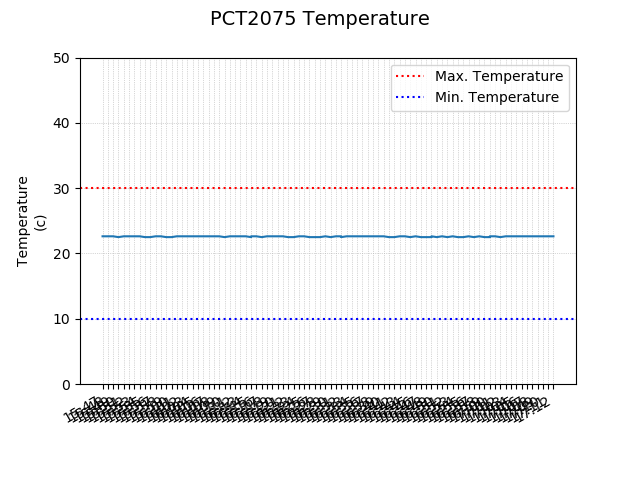

In [4]:
%matplotlib notebook
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

# How many sensor samples we want to store
HISTORY_SIZE = 100

# Graph update interval (in seconds)
INTERVAL = 0.5

# Maximum Temperature (in degrees C)
MAX_TEMP = 30

# Minimum Temperature (in degrees C)
MIN_TEMP = 10

# Global x-axis array
x_time = deque(maxlen=HISTORY_SIZE)

# Temperature data
temp_data = deque(maxlen=HISTORY_SIZE)

# Create new plot
fig, ax = plt.subplots()

# Global title
fig.suptitle("PCT2075 Temperature", fontsize=14)

def animate(i):
    # Read the temperature sensor and add the value to the temp_data array
    temp_data.append(pct.temperature)
    print(temp_data)
    
    # Grab the datetime, auto-range based on length of accel_x array
    x_time.append(datetime.now().strftime('%M:%S'))
    print(x_time)

    # Clear axis prior to plotting
    ax.cla()
    
    # Constrain the Y-axis
    plt.ylim(top=50,bottom=0)

    # Y-Axis label
    plt.ylabel('Temperature\n(c)')
    
    # Rotate and align the x-axis tick labels, add a grid
    fig.autofmt_xdate()
    ax.grid(True, linestyle=':', linewidth=0.5)

    # Add temperature plot to graph
    plt.plot(x_time, temp_data)
    
    # Add a horizontal minimum line across the X-axis
    plt.axhline(y=MAX_TEMP, color='r', linestyle=':', label='Max. Temperature')

    # Add a horizontal maximum line across the X-axis
    plt.axhline(y=MIN_TEMP, color='b', linestyle=':', label='Min. Temperature')
    
    # Add a legend to the graph
    ax.legend()
    
    # Pause the plot for INTERVAL seconds 
    plt.pause(INTERVAL)

ani = animation.FuncAnimation(fig, animate)